<a href="https://colab.research.google.com/github/A-Alviento/dijkstra-algorithm-time-complexity-analysis/blob/main/sc2001_ex_class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adjacency List**

In [ ]:
# Add a vertex to the dictionary
def add_vertex(v, graph, vertices_no, edge):
  if v in graph:
    print("Vertex ", v, " already exists.")
  else:
    vertices_no[0] = vertices_no[0] + 1
    graph[v] = []
    edge[v] = []
 
# Add an edge between vertex v1 and v2 with edge weight e
def add_edge(v1, v2, e, graph, edge):
  # Check if vertex v1 is a valid vertex
  if v1 not in graph:
    print("Vertex ", v1, " does not exist.")
  # Check if vertex v2 is a valid vertex
  elif v2 not in graph:
    print("Vertex ", v2, " does not exist.")
  # check if edge already exist
  elif(v2 in edge[v1]):
    return
  elif(v1 in edge[v2]):
    return
  # check if v1 and v2 are the same vertex
  elif(v1 == v2):
        return
  # assigns the edge in the dictionary
  else:
    temp = [v2, e]
    temp1 = [v1, e]
    graph[v1].append(temp)
    graph[v2].append(temp1)
    edge[v1].append(v2)
    edge[v2].append(v1)

# Print the graph
def print_graph(graph):
  for vertex in graph:
    for edges in graph[vertex]:
      print(vertex, " -> ", edges[0], " edge weight: ", edges[1])


**Adjacency Matrix**

In [ ]:
# Add a vertex to the set of vertices and the graph
def add_vertex1(v, graph, vertices_no, vertices):
  if v in vertices:
    print("Vertex ", v, " already exists")
  else:
    vertices_no[0] = vertices_no[0] + 1
    vertices.append(v)
    if vertices_no[0] > 1:
        for vertex in graph:
            vertex.append(0)
    temp = []
    for i in range(vertices_no[0]):
        temp.append(0)
    graph.append(temp)

# Add an edge between vertex v1 and v2 with edge weight e
def add_edge1(v1, v2, e, graph, vertices_no, vertices):
    # Check if vertex v1 is a valid vertex
    if v1 not in vertices:
      print("Vertex ", v1, " does not exist.")
    # Check if vertex v1 is a valid vertex
    elif v2 not in vertices:
      print("Vertex ", v2, " does not exist.")
    # check if edge already exist
    elif(graph[vertices.index(v1)][vertices.index(v2)]):
      return
    elif(graph[vertices.index(v2)][vertices.index(v1)]):
      return
    # check if v1 and v2 are the same
    elif(v1 == v2):
      return
    else:
      index1 = vertices.index(v1)
      index2 = vertices.index(v2)
      graph[index1][index2] = e
      graph[index2][index1] = e

# Print the graph
def print_graph1(graph, vertices_no, vertices):
  for i in range(vertices_no[0]):
    for j in range(vertices_no[0]):
      if graph[i][j] != 0:
        print(vertices[i], " -> ", vertices[j], \
        " edge weight: ", graph[i][j])

**Generate random Graphs**

In [ ]:
import random

# this function initialises a random graph of size n in both adjacency matrix and adjacency list
def ini_graph(n):

  # adjacency list
  graph = {}
  # stores the number of vertices for adjacency list
  vertices_no = [0]
  # stores edges for adjacency list
  edge = {}

  # adjacencry matrix
  graph1 = []
  # stores the number of vertices for adjacency matrix
  vertices_no1 = [0]
  # stores the vertices for adjacecy matrix
  vertices = []

  random_weight = []
  for i in range(1, n**2):
    random_weight.append(i)

  chance = [0, 0 , 1, 0]
  # initialises the vertices for both matrix and list
  for i in range(n):
    add_vertex(i, graph, vertices_no, edge)
    add_vertex1(i, graph1, vertices_no1, vertices)

  # Add the edges between the vertices by specifying
  # the from and to vertex along with the edge weights.
#  for i in range(n):
#    for j in range(n):
#      if (random.randint(0,1)):
#        weight = random_weight.pop(random.randint(0,len(random_weight)-1))
#        add_edge(i, j, weight, graph, edge)
#        add_edge1(i, j, weight, graph1, vertices_no1, vertices)
  for i in range(n-1):
    # weight = random_weight.pop(random.randint(0,len(random_weight)-1))
    for j in range(n-i):
      weight = random_weight.pop(random.randint(0,len(random_weight)-1))
      if (chance[random.randint(0,3)]):
        add_edge(i, i+j, weight, graph, edge)
        add_edge1(i, i+j, weight, graph1, vertices_no1, vertices)

  # print corresponding list and matrix
  #print ("adjacency list: ", graph)
  #print("adjacency matrix:")
  #for i in range(n):
  #  print(graph1[i])

  return [graph, graph1]

**Generate Fully complete graphs**

In [ ]:
import random

# this function initialises a random graph of size n in both adjacency matrix and adjacency list
def ini_com_graph(n):

  # adjacency list
  graph = {}
  # stores the number of vertices for adjacency list
  vertices_no = [0]
  # stores edges for adjacency list
  edge = {}

  # adjacencry matrix
  graph1 = []
  # stores the number of vertices for adjacency matrix
  vertices_no1 = [0]
  # stores the vertices for adjacecy matrix
  vertices = []

  random_weight = []
  for i in range(1, n**2+3):
    random_weight.append(i)


  # initialises the vertices for both matrix and list
  for i in range(n):
    add_vertex(i, graph, vertices_no, edge)
    add_vertex1(i, graph1, vertices_no1, vertices)

  # Add the edges between the vertices by specifying
  # the from and to vertex along with the edge weights.
  for i in range(n):
    for j in range(n):
      weight = random_weight.pop(random.randint(0,len(random_weight)-1))
      add_edge(i, j, weight, graph, edge)
      add_edge1(i, j, weight, graph1, vertices_no1, vertices)


  # print corresponding list and matrix
  # print ("adjacency list: ", graph)
  # print("adjacency matrix:")
  # for i in range(n):
  #  print(graph1[i])

  return [graph, graph1]

**Dijkstra I (Adjacency Matrix)** 

In [ ]:
# take second element for sort
def takeSecond(elem):
    return elem[1]

# take min element
def extract_min(s=[]):
  if(len(s) == 1):
    return s.pop()[0]
  tmp = s[0][1]
  j = s[0]
  for i in s:
    if (i[1] <= tmp):
      tmp = i[1]
      j = i
  k = s.index(j)
  return s.pop(k)[0]

# dijkstra algorithm using adjacency matrix with array for priority queue
# graph -> adjacency matrix; s -> source node; n -> size of graph
def dijkstra1(graph, s, n):
    d = []
    pi = []
    S = []
    pq = []

    for i in range(n):
      # d[v] is the estimated shortest distance from source to v
      # initially intialised as infinity for all vertices
      d.append(float('inf'))
      # pi[v] is the node just behind v in the shortest path
      pi.append(-1)
      # S[v] indicates if shortest path from source to v is already determined
      S.append(0)
      # pq is an array listing the vertices in increasing order of its d[]
      pq.append([i, d[i]]) 
    
    # initialises source node
    index = pq.index([s, d[s]])
    pq[index][1] = 0
    d[s] = 0
    
    # resort pq array
    pq.sort(key=takeSecond)
    
    while (len(pq) != 0):
      # removes first element of pq
      #u = pq.pop(0)[0]
      u = extract_min(pq)

      # indicates shortest distance is determined in this interaction
      S[u] = 1

      for i in range(n):
        if(graph[u][i]):
          if (S[i] != 1 and d[i] > d[u] + graph[u][i]):
            # update d[i] and corresponding d[i] in pq
            index = pq.index([i, d[i]])
            d[i] = d[u] + graph[u][i]
            pq[index][1] = d[i]

            # update pi[i] with the node just behind i in the shortest path
            pi[i] = u
            # resort pq array
            #pq.sort(key=takeSecond)
    print(pi)

**Heapify**

In [ ]:
def heapify(arr, n, i):
    smallest = i  # Initialize largest as root
    l = 2 * i + 1  # left = 2*i + 1
    r = 2 * i + 2  # right = 2*i + 2
 
 # See if left child of root exists and is
 # greater than root
 
    if l < n and arr[i][1] > arr[l][1]:
        smallest = l
 
 # See if right child of root exists and is
 # greater than root
 
    if r < n and arr[smallest][1] > arr[r][1]:
        smallest = r
 
 # Change root, if needed
 
    if smallest != i:
        (arr[i], arr[smallest]) = (arr[smallest], arr[i])  # swap
 
  # Heapify the root.
 
        heapify(arr, n, smallest)

# function to extract the min from the heap, and then fix the heap using heapify (fixheap)
def getMin(arr):
  # extract min
  tmp = arr[0]
  # if the heap is a leaf, then we simply pop and return
  if (len(arr) == 1):
    arr.pop()
    return tmp
  # else we need to fix the heap by calling heapify
  arr[0] = arr.pop()
  heapify(arr, len(arr), 0)
  return tmp

# in dijkstra II, every time we update some d[v], we need to ensure that the smallest is still the root node, so this function does just that
def updateKey(arr, v, weight):
  i = v
  # updates d[v]
  arr[v][1] = weight

  # this loop essentially ensures that v will keep swapping with its parent node if it is smaller, to maintain the minimising heap
  while(i > 0 and arr[i][1] < arr[(i-1)//2][1]):
    tmp = arr[(i-1)//2]
    arr[(i-1)//2] = arr[i]
    arr[i] = tmp
    i = (i-1)//2


**Dijkstra II (Adjacency List)**

In [ ]:
# dijkstra algorithm using adjacency matrix with array for priority queue
# graph -> adjacency matrix; s -> source node; n -> size of graph
def dijkstra2(graph, s, n):
    d = []
    pi = []
    S = []
    pq = []

    for i in range(n):
      # d[v] is the estimated shortest distance from source to v
      # initially intialised as infinity for all vertices
      d.append(float('inf'))
      # pi[v] is the node just behind v in the shortest path
      pi.append(-1)
      # S[v] indicates if shortest path from source to v is already determined
      S.append(0)
      # pq is an array listing the vertices in increasing order of its d[]
      pq.append([i, d[i]]) 
    
    # initialises source node
    index = pq.index([s, d[s]])
    pq[index][1] = 0
    d[s] = 0
    
    # updates heap pq, so that s is the root
    tmp = pq[s]
    pq[s] = pq[0]
    pq[0] = tmp
    
    while (len(pq) != 0):
      # removes first element of pq which contains minimum d[]
      U = getMin(pq)
      u = U[0]

      # indicates shortest distance is determined in this interaction
      S[u] = 1

      # we traverse the vertices connected to u
      for v in graph[u]:
        i = v[0]

        if (S[i] != 1 and d[i] > d[u] + v[1]):
          # update d[i] and corresponding weight in pq using updateKey to ensure minimising heap is maintained
          index = pq.index([i, d[i]])
          d[i] = d[u] + v[1]
          updateKey(pq, index, d[i])
          # update pi[i] with the node just behind i in the shortest path
          pi[i] = u

    print(pi)

**Driver Code**

[-1]
[-1]
[-1, 0]
[-1, 0]
[-1, 2, 0]
[-1, 2, 0]
[-1, 2, 0, -1]
[-1, 2, 0, -1]
[-1, -1, -1, 0, -1]
[-1, -1, -1, 0, -1]
[-1, -1, -1, -1, 0, -1]
[-1, -1, -1, -1, 0, -1]
[-1, 4, -1, -1, 0, 0, -1]
[-1, 4, -1, -1, 0, 0, -1]
[-1, -1, 5, -1, -1, 0, 0, 0]
[-1, -1, 5, -1, -1, 0, 0, 0]
[-1, 0, 8, 1, 0, 8, 1, 4, 3]
[-1, 0, 8, 1, 0, 8, 1, 4, 3]
[-1, -1, -1, -1, -1, 0, 0, -1, -1, -1]
[-1, -1, -1, -1, -1, 0, 0, -1, -1, -1]
[-1, 10, 4, 10, 0, 7, 4, 3, 7, 2, 0]
[-1, 10, 4, 10, 0, 7, 4, 3, 7, 2, 0]
[-1, 5, 9, -1, 1, 6, 0, 2, 0, 8, 5, 10]
[-1, 5, 9, -1, 1, 6, 0, 2, 0, 8, 5, 10]
[-1, 11, 5, 11, -1, 11, 8, 8, 0, 3, -1, 0, 1]
[-1, 11, 5, 11, -1, 11, 8, 8, 0, 3, -1, 0, 1]
[-1, 13, 6, 10, 1, 13, 0, 6, 6, 1, 0, 2, 10, 6]
[-1, 13, 6, 10, 1, 13, 0, 6, 6, 1, 0, 2, 10, 6]
[-1, -1, 11, 13, 12, 4, 0, 0, 11, 10, 0, 13, 11, 7, 11]
[-1, -1, 11, 13, 12, 4, 0, 0, 11, 10, 0, 13, 11, 7, 11]
[-1, 2, 13, 4, 13, 13, 8, 9, 0, 10, 0, 5, 6, 0, 0, 10]
[-1, 2, 13, 4, 13, 13, 8, 9, 0, 10, 0, 5, 6, 0, 0, 10]
[-1, 16, 5, 6, 16, 6, 0,

<Figure size 432x288 with 0 Axes>

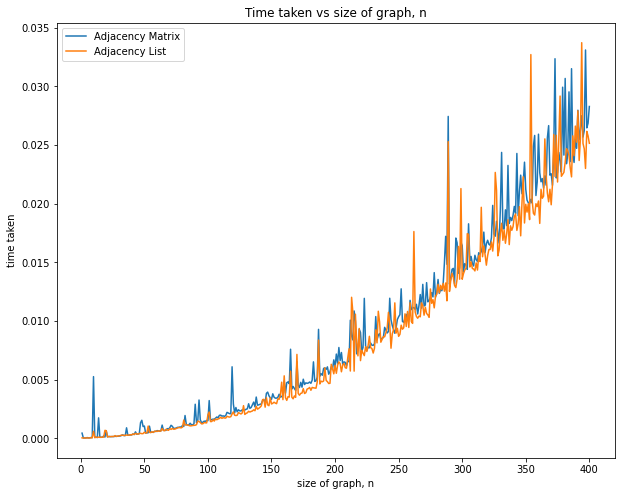

In [ ]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# y-axis for adjacency matrix (AM)
y = []
# y-axis for adjacecny list (AL)
y1 = []

# indicates the testing range for size of graph 
vert_num = []
for i in range(1, 401):
  vert_num.append(i)

# number of sample cases to do for each input size of graph, to reduce bias
case = 1

# records time for AM
time = 0
# records time for AL
time1 = 0

# records mean time for AM
mean = 0
# records mean time for AL
mean1 = 0

# iterate through the different input sizes for graph
for n in vert_num:
  # do case amount of test for each input to reduce bias
  for i in range(case):
    # generate an array of two different representation of a random graph of size n
    # index 0 -> AL; index 1 -> AM
    g = ini_graph(n)
    al = g[0]
    am = g[1]

    # accumulate time for AM over the test cases
    # time += timeit.timeit(stmt='dijkstra(am, 0, n)', setup='', number=1, globals = globals())
    time += timeit.timeit(stmt='dijkstra1(am, 0, n)', setup='', number=1, globals = globals())
    # accumulate time for AL over the test cases
    time1 += timeit.timeit(stmt='dijkstra2(al, 0, n)', setup='', number=1, globals = globals())
  # get the mean
  mean = time/case
  mean1 = time1/case

  # record down
  y.append(mean)
  y1.append(mean1)

  # reset values
  mean = 0
  mean1 = 0
  time = 0
  time1 = 0


# plotting the results
plt.figure()
figure(figsize=(10,8))

plt.title("Time taken vs size of graph, n")

plt.xlabel("size of graph, n")
plt.ylabel("time taken")

plt.plot(vert_num, y, label = "Adjacency Matrix")
plt.plot(vert_num, y1, label = "Adjacency List")
plt.legend()
plt.show()


**Driver Code (FOR COMPLETE GRAPHS)**

In [ ]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# y-axis for adjacency matrix (AM)
y = []
# y-axis for adjacecny list (AL)
y1 = []

# indicates the testing range for size of graph 
vert_num = []
for i in range(2, 501):
  vert_num.append(i)

# number of sample cases to do for each input size of graph, to reduce bias
case = 10

# records time for AM
time = 0
# records time for AL
time1 = 0

# records mean time for AM
mean = 0
# records mean time for AL
mean1 = 0

# iterate through the different input sizes for graph
for n in vert_num:
  # do case amount of test for each input to reduce bias
  for i in range(case):
    # generate an array of two different representation of a random graph of size n
    # index 0 -> AL; index 1 -> AM
    g = ini_com_graph(n)
    al = g[0]
    am = g[1]

    # accumulate time for AM over the test cases
    time += timeit.timeit(stmt='dijkstra(am, 0, n)', setup='', number=1, globals = globals())
    # accumulate time for AL over the test cases
    time1 += timeit.timeit(stmt='dijkstra2(al, 0, n)', setup='', number=1, globals = globals())
  # get the mean
  mean = time/case
  mean1 = time1/case

  # record down
  y.append(mean)
  y1.append(mean1)

  # reset values
  mean = 0
  mean1 = 0
  time = 0
  time1 = 0


# plotting the results
plt.figure()
figure(figsize=(10,8))

plt.title("Time taken vs size of graph, n")

plt.xlabel("size of graph, n")
plt.ylabel("time taken")

plt.plot(vert_num, y, label = "Adjacency Matrix")
plt.plot(vert_num, y1, label = "Adjacency List")
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
[-1, 233, 147, 191, 73, 34, 80, 164, 70, 208, 116, 157, 7, 74, 152, 232, 189, 164, 117, 95, 106, 155, 124, 206, 141, 123, 123, 30, 71, 174, 127, 227, 157, 143, 141, 55, 98, 43, 39, 7, 54, 47, 101, 208, 43, 17, 26, 125, 15, 132, 142, 120, 35, 188, 26, 144, 127, 213, 192, 122, 124, 22, 125, 232, 151, 58, 120, 196, 199, 220, 225, 7, 189, 206, 17, 7, 125, 157, 79, 43, 48, 208, 75, 164, 115, 130, 200, 106, 113, 152, 208, 242, 222, 189, 155, 0, 224, 161, 195, 39, 234, 160, 222, 191, 144, 174, 0, 232, 152, 142, 62, 116, 58, 75, 139, 80, 182, 132, 0, 152, 0, 37, 48, 17, 87, 35, 111, 95, 115, 232, 233, 79, 213, 129, 93, 0, 60, 206, 232, 79, 89, 54, 93, 234, 164, 228, 105, 201, 69, 34, 219, 129, 164, 232, 79, 164, 153, 232, 60, 154, 198, 200, 198, 157, 106, 147, 171, 98, 87, 144, 98, 104, 136, 98, 120, 115, 150, 219, 224, 208, 24, 110, 155, 154, 227, 50, 224, 54, 15, 219, 160, 26, 17, 39, 162, 153, 29, 151, 15, 105, 234, 106, 192, 140, 222, 237,

<Figure size 432x288 with 0 Axes>

Testing code (don't delete)

In [ ]:
import timeit
import time
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# generate an array of two different representation of a random graph of size n
# index 0 -> AL; index 1 -> AM
n = 10
g = ini_com_graph(n)
al = g[0]
am = g[1]

# accumulate time for AM over the test cases
time = timeit.timeit(stmt='dijkstra(am, 0, n)', setup='', number=1, globals = globals())
# accumulate time for AL over the test cases
time1 = timeit.timeit(stmt='dijkstra2(al, 0, n)', setup='', number=1, globals = globals())

adjacency list:  {0: [[1, 64], [2, 100], [3, 75], [4, 7], [5, 54], [6, 49], [7, 37], [8, 50], [9, 4]], 1: [[0, 64], [2, 18], [3, 39], [4, 94], [5, 2], [6, 27], [7, 70], [8, 30], [9, 88]], 2: [[0, 100], [1, 18], [3, 33], [4, 14], [5, 91], [6, 25], [7, 24], [8, 92], [9, 77]], 3: [[0, 75], [1, 39], [2, 33], [4, 17], [5, 61], [6, 81], [7, 83], [8, 87], [9, 5]], 4: [[0, 7], [1, 94], [2, 14], [3, 17], [5, 66], [6, 48], [7, 55], [8, 9], [9, 34]], 5: [[0, 54], [1, 2], [2, 91], [3, 61], [4, 66], [6, 79], [7, 28], [8, 42], [9, 57]], 6: [[0, 49], [1, 27], [2, 25], [3, 81], [4, 48], [5, 79], [7, 44], [8, 97], [9, 85]], 7: [[0, 37], [1, 70], [2, 24], [3, 83], [4, 55], [5, 28], [6, 44], [8, 84], [9, 21]], 8: [[0, 50], [1, 30], [2, 92], [3, 87], [4, 9], [5, 42], [6, 97], [7, 84], [9, 67]], 9: [[0, 4], [1, 88], [2, 77], [3, 5], [4, 34], [5, 57], [6, 85], [7, 21], [8, 67]]}
adjacency matrix:
[0, 64, 100, 75, 7, 54, 49, 37, 50, 4]
[64, 0, 18, 39, 94, 2, 27, 70, 30, 88]
[100, 18, 0, 33, 14, 91, 25, 24, 9